# Ejercicio Ecommerce

En este ejercicio, se proporcionan datos ficticios sobre compras realizadas por Amazon, por lo que es posible que exista alguna incoherencia en los datos. Se trata de ir realizando cada uno de los ejercicios propuestos progresivamente. Hay más de una forma de hacerlos, y todos se pueden responder con una línea.

El enlace es:

```python
URL_data = 'https://raw.githubusercontent.com/MatinMasimli/DataScience_ML_Udemy_Exercises/master/Ecommerce_purchases/Ecommerce%20Purchases.csv'
```

Cargamos la librería pandas como 'pd' y numpy como 'np':

In [28]:
#LIBRERIAS NECESARIAS
'''
!pip install pandas 
!pip install numpy
'''

'\n!pip install pandas\n!pip install numpy\n'

In [1]:
import pandas as pd
import numpy as np

Ahora, leemos el DataFrame y mostramos sus cinco primeras filas:

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/MatinMasimli/DataScience_ML_Udemy_Exercises/master/Ecommerce_purchases/Ecommerce%20Purchases.csv')

In [30]:
df.head(1)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14


### FORMAS DE GUARDAR LA DATA

In [14]:
df.to_csv('data/purchases.csv', index=False) #Forma de salvar el archivo una vez cargado en una variable

In [15]:
#Forma de descargar el archivo directamente desde la web

import requests

url = 'https://raw.githubusercontent.com/MatinMasimli/DataScience_ML_Udemy_Exercises/master/Ecommerce_purchases/Ecommerce%20Purchases.csv'
response = requests.get(url)
with open('data/purchases.csv', 'wb') as file:
    file.write(response.content)


#### COMPROBAR NULOS

In [41]:
df.isnull().sum() #Verificar si hay valores nulos en el dataset

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

<Axes: >

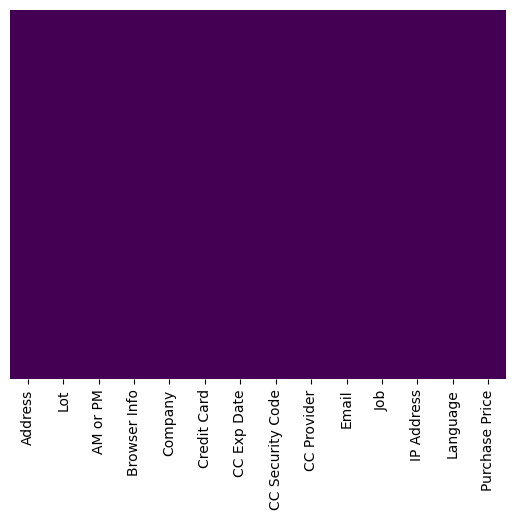

In [42]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

#### COMPROBAR DUPLICADOS

In [44]:
df.duplicated().sum() #Verificar si hay valores duplicados en el dataset

0

### Ejercicios

¿Qué dimensiones tienen nuestros datos?

In [32]:
df.shape

(10000, 14)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


*Respuesta esperada:*

```python
(10000,14)
```

¿Cuál es el precio medio de compra?

In [18]:
df.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [38]:
df['Purchase Price'].mean().round(2)

50.35

*Respuesta esperada:*

```python
50.34730200000025
```

Cuáles fueron, respectivamente, los precios mayores y menores de compra?

In [20]:
df['Purchase Price'].max() 

99.99

In [21]:
df['Purchase Price'].min() 

0.0

*Respuesta esperada:*

```python
99.989999999999995
```

*Respuesta esperada:*

```python
0.0
```

¿Cuánta gente tiene indicado como inglés (valor 'en') el idioma preferente?

In [52]:
df['Language'].value_counts()['en']

1098

*Respuesta esperada:*

```python
1098
```

¿Cuánta gente dispone del título profesional `'Lawyer'`?


In [27]:
df['Job'].value_counts()['Lawyer']

30

*Respuesta esperada:*

```python
30
```

¿Cuántas personas hicieron compras durante la mañana, y cuántas durante la tarde?

*(Pista: Use [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html))*

In [45]:
df['AM or PM'].value_counts()

AM or PM
PM    5068
AM    4932
Name: count, dtype: int64

*Respuesta esperada:*

```python
PM    5068
AM    4932
Name: AM or PM, dtype: int64
```

¿Cuáles son las cinco profesiones más habituales?

In [61]:
df['Job'].value_counts().head(3)

Job
Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Name: count, dtype: int64

*Respuesta esperada:*

```python
Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64
```

Algún usuario hizo una compra que vino en el lote `90 WT`. ¿Cuál fue el precio de esa transacción?

In [75]:
df[df['Lot'] == '90 WT']['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

*Respuesta esperada:*

```python
513    75.1
Name: Purchase Price, dtype: float64
```

¿Cuál es el email de la persona con tarjeta de crédito `4926535242672853`?

In [63]:
df[df['Credit Card'] == 4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

*Respuesta esperada:*

```python
1234    bondellen@williams-garza.com
Name: Email, dtype: object
```

¿Cuánta gente tiene `American Express` como proveedor de crédito e hizo una compra superior a `$95`?

In [84]:
df.shape[1]

14

In [80]:
df[(df['CC Provider'] == 'American Express') & (df['Purchase Price'] > 95)].shape[0]

39

*Respuesta esperada:*

```python
39
```

¿Cuánta gente tiene una tarjeta de crédito que expira en 2025?

In [85]:
df['CC Exp Date']

0       02/20
1       11/18
2       08/19
3       02/24
4       10/25
        ...  
9995    03/22
9996    07/25
9997    05/21
9998    11/17
9999    02/19
Name: CC Exp Date, Length: 10000, dtype: object

In [70]:
def expiration_year(x):
    return x.split('/')[1]

df['CC Exp Date'].apply(expiration_year).value_counts()

CC Exp Date
25    1033
23    1010
21    1006
22     996
18     995
19     995
24     992
20     988
17     955
26     654
16     376
Name: count, dtype: int64

In [68]:
df[df['CC Exp Date'].apply(lambda x: x[3:] == '25')].shape[0] 

1033

*Respuesta esperada:*

```python
1033
```

¿Cuáles fueron los cinco *email hosts* más populares (e.g., gmail, yahoo,...)?

In [86]:
df['Email']

0                    pdunlap@yahoo.com
1                   anthony41@reed.com
2       amymiller@morales-harrison.com
3          brent16@olson-robinson.info
4          christopherwright@gmail.com
                     ...              
9995            iscott@wade-garner.com
9996                mary85@hotmail.com
9997                 tyler16@gmail.com
9998           elizabethmoore@reid.net
9999             rachelford@vaughn.com
Name: Email, Length: 10000, dtype: object

In [71]:
df['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5)

Email
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: count, dtype: int64

*Respuesta esperada:*

```python
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64
```